In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pylab import rcParams

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 20, 10

In [3]:
import os
import gzip
import shutil

folder = 'mobilised-contextual-factors-v1'

def extractFiles(path, verbose=False):
    for p in os.listdir(folder):
        i=0
        subfold = os.path.join(folder, p)
        for f in os.listdir(subfold):
            i+=1
            if f.endswith('.gz'):
                filename = os.path.join(subfold, f)
                extr_filename = filename.split('.gz')[0]
                with gzip.open(filename, 'rb') as f_in:
                    with open(extr_filename, 'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
        if verbose:
            print(f'Extracted {i} files for patient {p}')

In [4]:
import pandas as pd
import numpy as np

info_df = pd.read_csv('CF_RWS_missingfiles.xlsx - Sheet1.csv')
info_df.drop(columns='Unique ID ', inplace=True)

In [5]:
info_df.head(10)

,ID,Cohort,D1_RWS,D2_RWS,D3_RWS,D4_RWS,D5_RWS,D6_RWS,D7_RWS,FL_RWS,Mean,SD
0,1000,HA,1.435969103,1.208401082,1.47810092,1.266655896,1.091846016,1.19178053,1.303706372,0.52494135,1.152204595,0.3011331211
1,1001,HA,0.7617805546,1.19912152,0.9624181844,1.338421753,0.9198683369,1.188084293,0.5,-,1.017985681,0.2891685504
2,1002,HA,1.265350375,1.442073541,1.219132102,1.177058133,1.279356812,1.435563794,1.396013597,-,1.32486633,0.1073837562
3,1003,PD,0.69954984,0.664800558,0.817476946,0.994005528,0.810221351,1.02773144,1.336634741,1.234558728,0.9481223915,0.2290128237
4,1004,PD,0.844786013,0.8920834942,1.053314499,0.9711816153,0.7733374742,1.097224889,1.097224889,-,0.9613075535,0.1285896639
5,1005,PD,1.267099798,0.577708104,0.692487668,1.15232039,1.04157882,1.245193767,0.857921834,1.069256386,0.9879458459,0.2544200958
6,1006,COPD,0.5794542551,0.925525475,1.016206426,1.074272686,0.828173891,0.747681114,1.00362861,0.730722234,0.8632080864,0.1707967679
7,1007,COPD,1.280669881,1.028317112,1.441277606,0.8890439578,1.244073181,1.25669323,-,-,1.190012495,0.197711534
8,1008,HA,1.43906575,1.838087746,1.751026051,1.751026051,1.719487051,1.662955206,1.629731588,-,1.684482778,0.1273881511
9,1009,PD,1.02140015,1.455552837,1.059055115,0,1.495886345,-,-,-,1.257973611,0.2524385006


In [6]:
info_df.replace('-', np.nan, inplace=True)

In [7]:
info_df.head(10)

,ID,Cohort,D1_RWS,D2_RWS,D3_RWS,D4_RWS,D5_RWS,D6_RWS,D7_RWS,FL_RWS,Mean,SD
0,1000,HA,1.435969103,1.208401082,1.47810092,1.266655896,1.091846016,1.19178053,1.303706372,0.52494135,1.152204595,0.3011331211
1,1001,HA,0.7617805546,1.19912152,0.9624181844,1.338421753,0.9198683369,1.188084293,0.5,NaN,1.017985681,0.2891685504
2,1002,HA,1.265350375,1.442073541,1.219132102,1.177058133,1.279356812,1.435563794,1.396013597,NaN,1.32486633,0.1073837562
3,1003,PD,0.69954984,0.664800558,0.817476946,0.994005528,0.810221351,1.02773144,1.336634741,1.234558728,0.9481223915,0.2290128237
4,1004,PD,0.844786013,0.8920834942,1.053314499,0.9711816153,0.7733374742,1.097224889,1.097224889,NaN,0.9613075535,0.1285896639
5,1005,PD,1.267099798,0.577708104,0.692487668,1.15232039,1.04157882,1.245193767,0.857921834,1.069256386,0.9879458459,0.2544200958
6,1006,COPD,0.5794542551,0.925525475,1.016206426,1.074272686,0.828173891,0.747681114,1.00362861,0.730722234,0.8632080864,0.1707967679
7,1007,COPD,1.280669881,1.028317112,1.441277606,0.8890439578,1.244073181,1.25669323,NaN,NaN,1.190012495,0.197711534
8,1008,HA,1.43906575,1.838087746,1.751026051,1.751026051,1.719487051,1.662955206,1.629731588,NaN,1.684482778,0.1273881511
9,1009,PD,1.02140015,1.455552837,1.059055115,0,1.495886345,NaN,NaN,NaN,1.257973611,0.2524385006


In [8]:
info_df.loc[info_df['ID']==3011]

,ID,Cohort,D1_RWS,D2_RWS,D3_RWS,D4_RWS,D5_RWS,D6_RWS,D7_RWS,FL_RWS,Mean,SD
55,3011,MS,NaN,0.939241775,1.299488989,0.961851214,1.187980886,1.214225988,1.1568706,1.203426462,1.137583702,0.1251033395


In [9]:
#nans_l = info_df.isnull().sum(axis=1)
#type(nans_l)
#idx_val = nans_l.where(nans_l<2).dropna().index.to_list()

In [10]:
#val_df = info_df[info_df.index.isin(idx_val)]
#val_df.head(10)

In [11]:
#print([el for el in info_df.ID.values if el not in val_df.ID.values])

In [12]:
#val_df.dropna(axis=1, inplace=True)
#val_df = val_df[(val_df.T !='0').all()].reset_index()
#val_df.head(len(val_df))

In [13]:
info_df.ID.values

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010,
       3011, 3013, 3014, 4002, 4005, 4006, 4011, 4013, 4019, 5000, 5003,
       5005, 5008, 5009, 5010, 5012, 5019], dtype=int64)

IDEA:
* select only those patients who have both indoor and outdoor experiments
* normalize/standardize the steps per second based on the patient
* plot the norm steps distribution for each pathology in the cohort
* looking for boundaries/threshold to discern the step behaviour indoor/outdoor for each cohort

Here I store the subjects' ID that haven't enough data to working on (non valid IDS). 
The same list is then used to filter out those patients that have either all indoor or outdoor actions and an high amount of 0.5 step per second (?)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scl = StandardScaler()
norm = MinMaxScaler()
#df = pd.DataFrame()
#ctx_array = np.empty([86400,])
#s_array = np.empty([86400,]
ctx_l, ctx_subj_i = [], []
s_l, s_subj_i  = [], []

non_valid_ids = []

for p in os.listdir(folder):
    #if int(p) in val_df['ID'].values:
    try:
        cohort = info_df[info_df['ID']==int(p)]['Cohort'].values[0]
        print('Processing subject: ', p)
        subfold = os.path.join(folder, p)
        for f in os.listdir(subfold):
            if 'Day' in f:
                if f.endswith('.json') and 'step' in f:
                    steps_file = pd.read_json(os.path.join(subfold, f))
                    #steps_arr = np.expand_dims(np.array(steps_file['data'][0]['steps'], dtype=float), 1)
                    #scl_steps = scl.fit_transform(steps_arr)
                    #norm_steps = norm.fit_transform(scl_steps)
                    s_l.append([[p, cohort, f.split('-')[3], float(el)] for el in steps_file['data'][0]['steps']])
                elif f.endswith('.json') and 'Context' in f:
                    json_ctx_file = pd.read_json(os.path.join(subfold, f))
                    ctx_l.append([[k, json_ctx_file['data'][0]['contextValues'][k][0]] for k in json_ctx_file['data'][0]['contextValues']])
                    
    except:
        continue
    #else:
    #    non_valid_ids.append(p)

ctx_array = np.array(ctx_l)
s_array = np.array(s_l)
print(ctx_array.shape, s_array.shape)

Processing subject:  1000
Processing subject:  1001
Processing subject:  1002
Processing subject:  1003
Processing subject:  1004
Processing subject:  1005
Processing subject:  1006
Processing subject:  1007
Processing subject:  1008
Processing subject:  1009
Processing subject:  1010
Processing subject:  1011
Processing subject:  1012
Processing subject:  1013
Processing subject:  1014
Processing subject:  1015
Processing subject:  1016
Processing subject:  1017
Processing subject:  1018
Processing subject:  1019
Processing subject:  1020
Processing subject:  1021
Processing subject:  1022
Processing subject:  1023
Processing subject:  1024
Processing subject:  1025
Processing subject:  1026
Processing subject:  1027
Processing subject:  1028
Processing subject:  1029
Processing subject:  2000
Processing subject:  2001
Processing subject:  2002
Processing subject:  2003
Processing subject:  2004
Processing subject:  2005
Processing subject:  2006
Processing subject:  2007
Processing s

In [15]:
del ctx_l, s_l

In [17]:
ctx_array = np.reshape(ctx_array, (ctx_array.shape[0]*ctx_array.shape[1], 2))
s_array = np.reshape(s_array, (s_array.shape[0]*s_array.shape[1], 4))

In [18]:
ctx_df = pd.DataFrame(ctx_array, columns=['Timestamp', 'IndoorProb'])
step_df = pd.DataFrame(s_array, columns=['Patient', 'Cohort', 'Day', 'StepPerSec'])

ctx_df.head()

,Timestamp,IndoorProb
0,1597273200,100
1,1597273201,100
2,1597273202,100
3,1597273203,100
4,1597273204,100


In [ ]:
del ctx_array, s_array

In [27]:
ctx_df['IndoorProb'].astype(dtype=np.int16)

0           100
1           100
2           100
3           100
4           100
           ... 
34732795     50
34732796     50
34732797     50
34732798     50
34732799     50
Name: IndoorProb, Length: 34732800, dtype: int16

In [28]:
full_df = pd.concat([step_df, ctx_df], axis=1)
del step_df,ctx_df

Delete the uncertain 50 value for indoor/outdoor

In [29]:
full_df.dropna(inplace=True)

In [30]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33523200 entries, 0 to 33523199
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Patient     object
 1   Cohort      object
 2   Day         object
 3   StepPerSec  object
 4   Timestamp   object
 5   IndoorProb  object
dtypes: object(6)
memory usage: 1.7+ GB


In [31]:
full_df = full_df[full_df['IndoorProb']!=50]

In [ ]:
#full_df.drop(columns='Patient', inplace=True)

In [ ]:
full_df['StepPerSec'] = full_df['StepPerSec'].astype('float32')

In [ ]:
full_df.to_csv('full_df.csv')

In [24]:
df_nonzero = full_df[full_df['StepPerSec'] > 0.].reset_index(drop=True)

In [25]:
df_nonzero.columns

Index(['Patient', 'Cohort', 'Day', 'StepPerSec', 'IndoorProb'], dtype='object')

In [26]:
df_nonzero.Cohort

0           HA
1           HA
2           HA
3           HA
4           HA
          ... 
1151069    CHF
1151070    CHF
1151071    CHF
1151072    CHF
1151073    CHF
Name: Cohort, Length: 1151074, dtype: object

In [28]:
df_nonzero['Cohort'].value_counts()

HA      460483
MS      241799
PD      211459
COPD    152310
CHF      68649
PFF      16374
Name: Cohort, dtype: int64

In [65]:
#c_df = df_nonzero.groupby(['Cohort','IndoorProb'])['StepPerSec']
Q1 = df_nonzero['StepPerSec'].quantile(0.25)
Q3 = df_nonzero['StepPerSec'].quantile(0.75)
IQR = Q3 - Q1
IQR

1.3181818723678589

In [66]:
Q3 + 1.5 * IQR

3.795454680919647

In [71]:
outlier_df1 = df_nonzero[df_nonzero['StepPerSec']>(Q3 + 1.5 * IQR)]
outlier_df2 = df_nonzero[df_nonzero['StepPerSec']>4]
outlier_df1

,Patient,Cohort,Day,StepPerSec,IndoorProb
174652,1004,PD,Day4,4.0,0
174653,1004,PD,Day4,4.0,0
548458,1018,HA,Day5,19.0,0
589728,1023,COPD,Day3,5.0,100
589729,1023,COPD,Day3,5.0,100
589730,1023,COPD,Day3,5.0,100
589731,1023,COPD,Day3,5.0,100
841687,3000,PD,Day7,19.0,0
841688,3000,PD,Day7,19.0,0
984274,3013,MS,Day3,9.0,0


In [91]:
clean_df1 = df_nonzero[~((df_nonzero['StepPerSec'] > (Q3 + 1.5 * IQR)))]
clean_df2 = df_nonzero[~((df_nonzero['StepPerSec'] > 4))]
clean_df3 = df_nonzero[~((df_nonzero['StepPerSec'] > (Q3 + 1.5 * IQR)) | (df_nonzero['StepPerSec'] == 0.5))]
clean_df4 = df_nonzero[~((df_nonzero['StepPerSec'] > 4) | (df_nonzero['StepPerSec'] == 0.5) )]

In [92]:
def create_stat_df(df):
    max_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].max().rename(columns={'StepPerSec':'MaxStepPerSec'})
    min_df = df.groupby(['Cohort','IndoorProb'], as_index=False)['StepPerSec'].min().rename(columns={'StepPerSec':'MinStepPerSec'})
    std_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].std().rename(columns={'StepPerSec':'StdStepPerSec'})
    mean_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].mean().rename(columns={'StepPerSec':'MeanStepPerSec'})
    q1_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].quantile(0.25).rename(columns={'StepPerSec':'Q1(0.25)'})
    q2_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].quantile(0.5).rename(columns={'StepPerSec':'Q2(0.5)'})
    q3_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].quantile(0.75).rename(columns={'StepPerSec':'Q3(0.75)'})
    q4_df = df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec'].quantile(0.95).rename(columns={'StepPerSec':'Q4(0.95)'})

    res_df = pd.concat([max_df, min_df, std_df, mean_df, q1_df, q2_df, q3_df, q4_df], axis=1)
    #stat_df = pd.concat([max_df, min_df, std_df, mean_df], axis=1)
    res_df = res_df.loc[:,~res_df.columns.duplicated()].copy()

    ids_cohort = {'Cohort':[], 'IndoorProb':[], 'IDs': []}
    for k,group in df.groupby(['Cohort', 'IndoorProb']):
        ids_cohort['Cohort'].append(k[0])
        ids_cohort['IndoorProb'].append(k[1])
        ids_cohort['IDs'].append(group['Patient'].unique())

    id_df = pd.DataFrame(ids_cohort)
    res_df = res_df.join(id_df.set_index(['Cohort', 'IndoorProb']), on=['Cohort', 'IndoorProb'])
    
    return res_df

In [93]:
stat_df = create_stat_df(df_nonzero)
clean_stat_df1 = create_stat_df(clean_df1)
clean_stat_df2 = create_stat_df(clean_df2)
clean_stat_df3 = create_stat_df(clean_df3)
clean_stat_df4 = create_stat_df(clean_df4)

In [94]:
with pd.ExcelWriter('stats_steps_cohort.xlsx') as writer:  # doctest: +SKIP
    stat_df.to_excel(writer, sheet_name='Raw Dataset')
    clean_stat_df1.to_excel(writer, sheet_name='Cleaned Dataset 1')
    clean_stat_df2.to_excel(writer, sheet_name='Cleaned Dataset 2')
    clean_stat_df3.to_excel(writer, sheet_name='Cleaned Dataset 3')
    clean_stat_df4.to_excel(writer, sheet_name='Cleaned Dataset 4')
    outlier_df1.to_excel(writer, sheet_name='Outlier Dataset 1')
    outlier_df2.to_excel(writer, sheet_name='Outlier Dataset 2')

In [117]:
def plot_time_series(df, PATH):
    for k,group in df.groupby(['Cohort', 'IndoorProb'], as_index=False)['StepPerSec']:
        #print(f'Patients belonging to {k[0]}: {group}')
        plt.close()
        group.reset_index(inplace=True)
        #sns.histplot(data=group, x='StepPerSec', kde=True)
        plt.plot(group['StepPerSec'])
        plt.title(k)
        plt.tight_layout()
        #sns.catplot(x="IndoorProb", y="StepPerSec",
        #kind="violin", palette="Set2", data=group, inner='quartile', scale='count')
        #plt.show()
        plt.savefig(f'{PATH}/{k[0]}_{k[1]}.png')

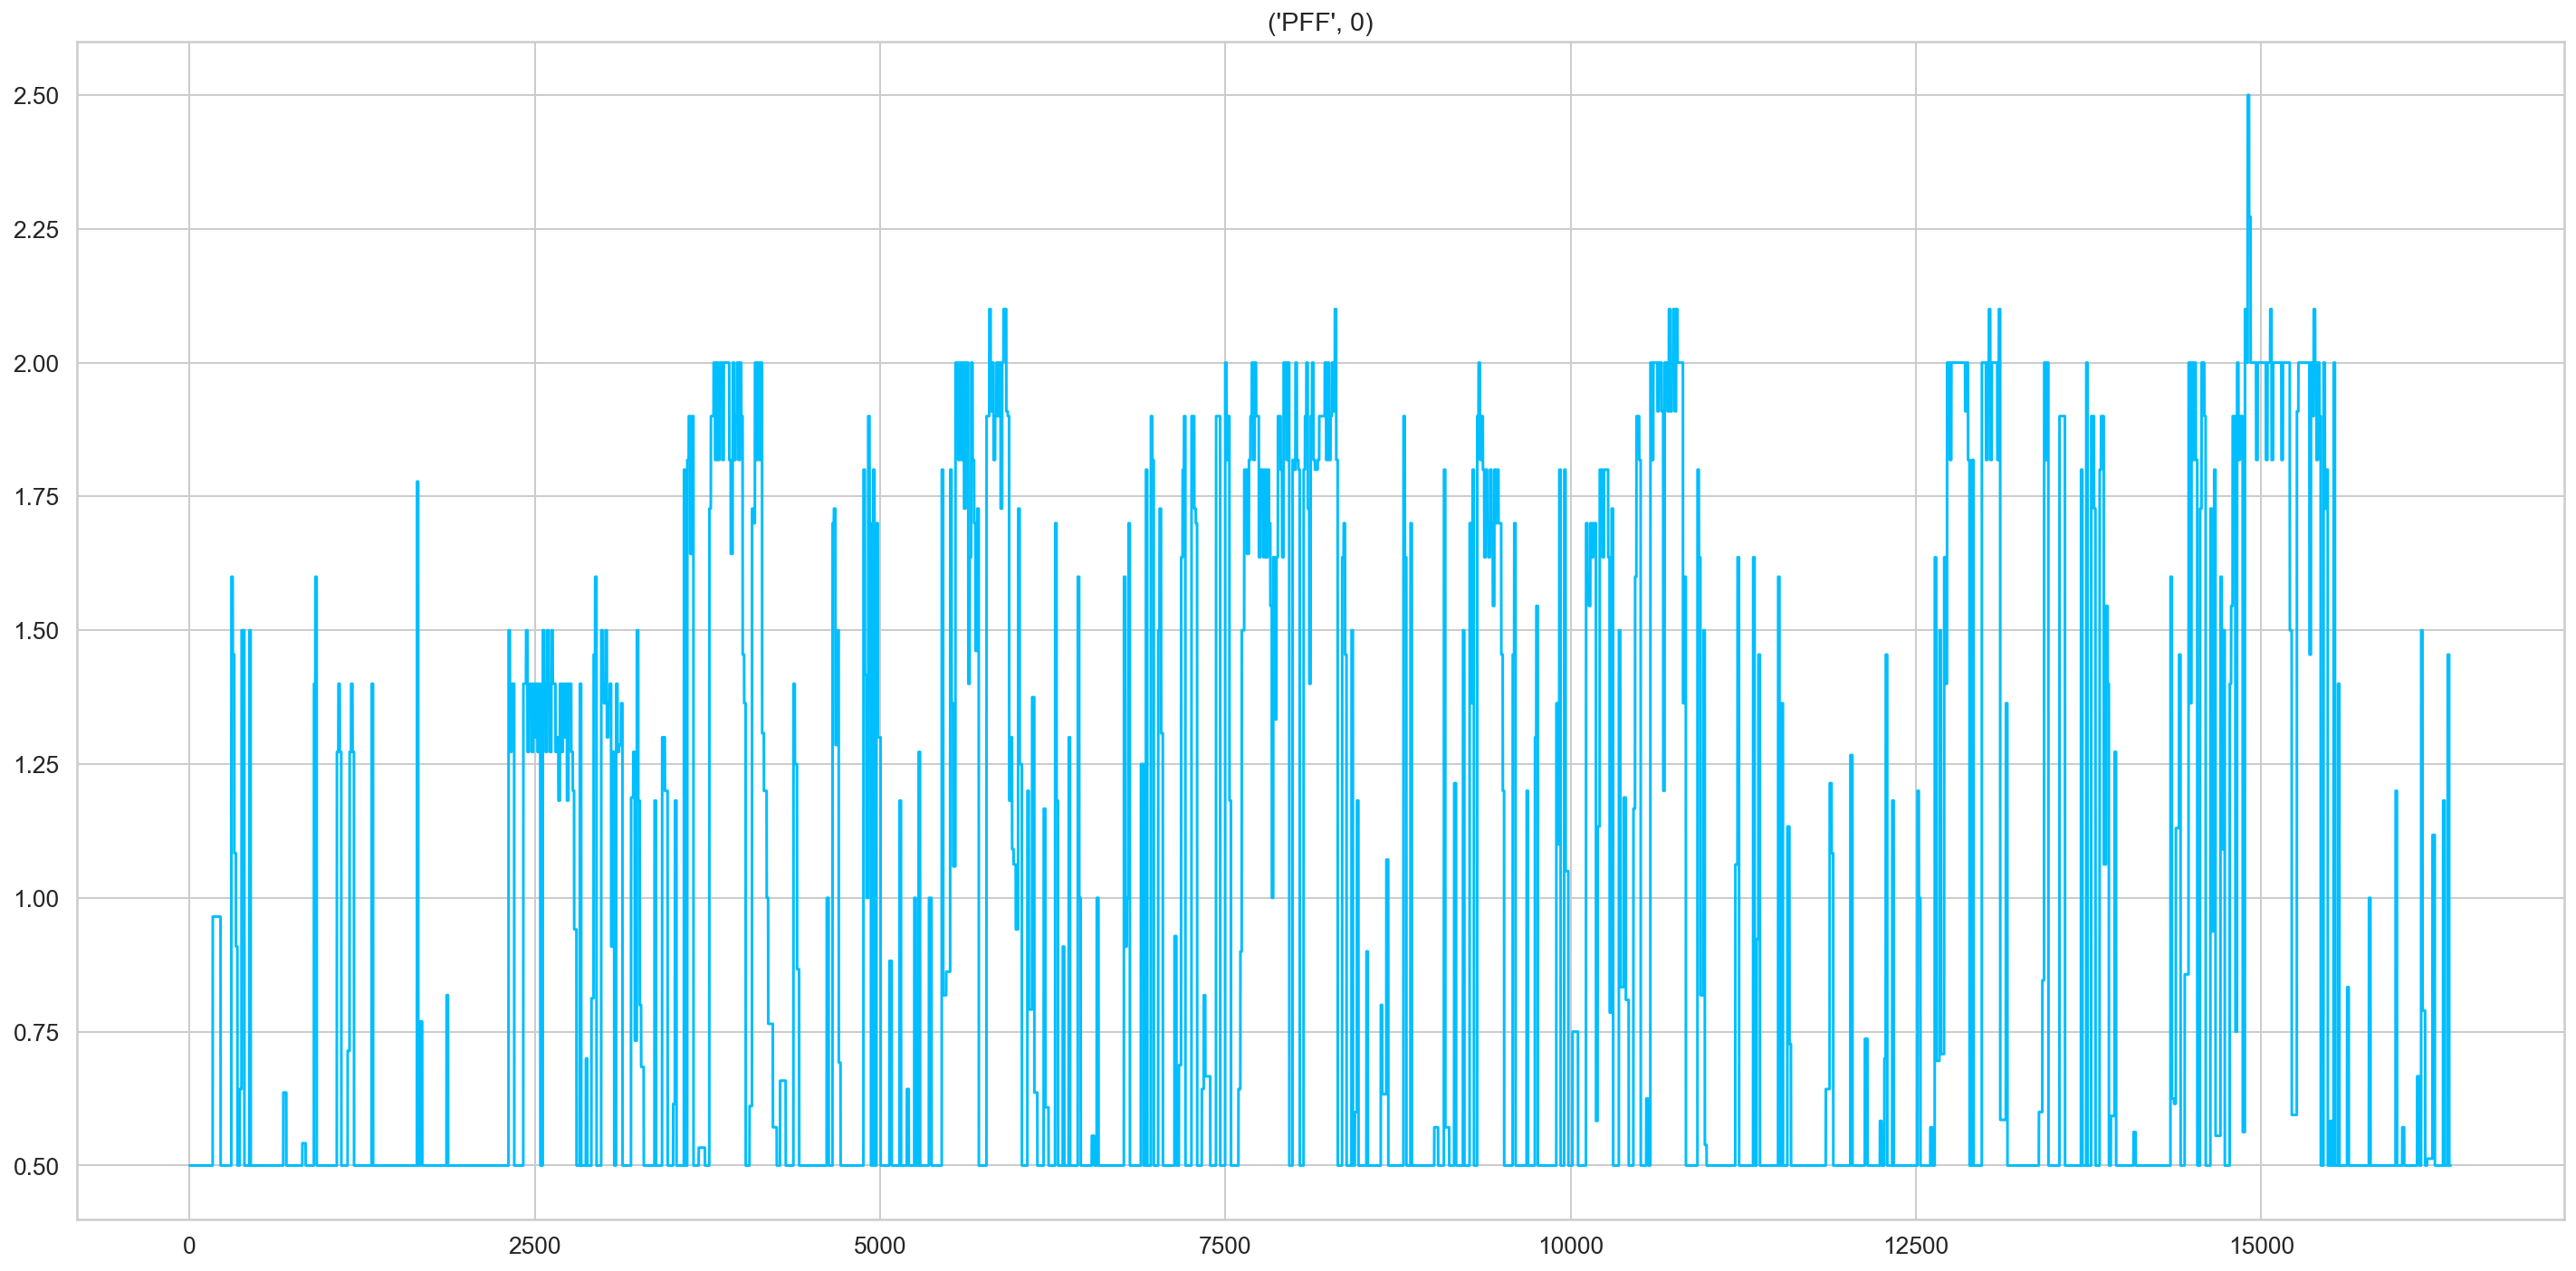

In [118]:
plot_time_series(df_nonzero, 'plotting_data/raw_dataset')

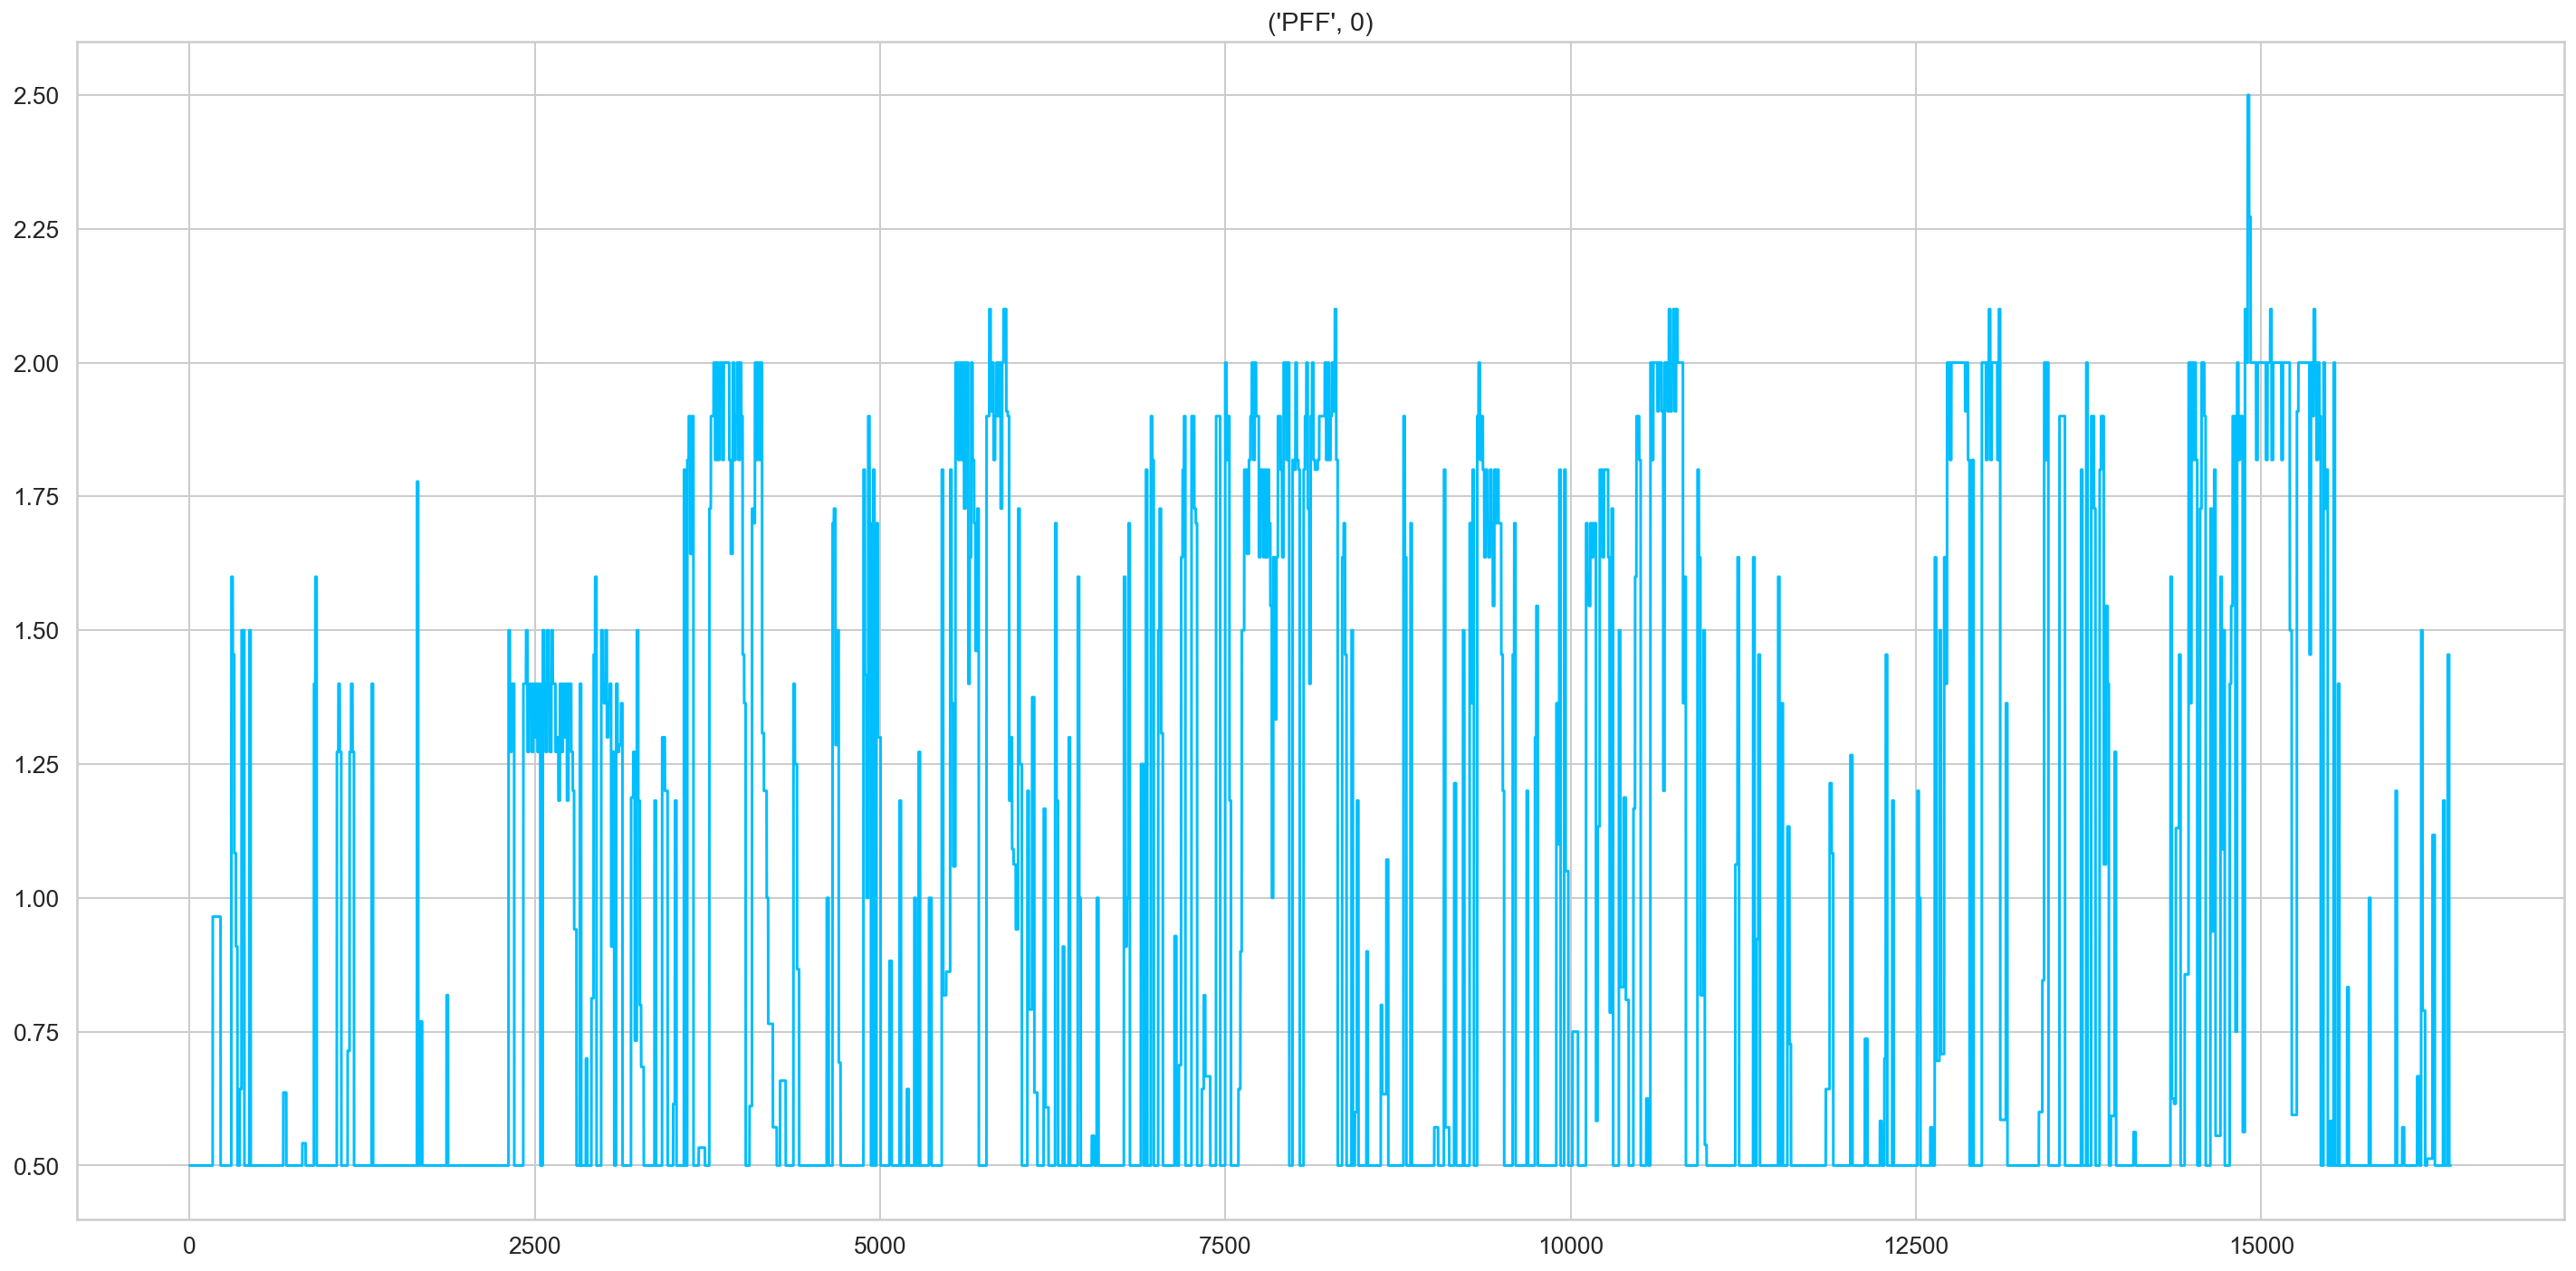

In [119]:
plot_time_series(clean_df1,'plotting_data/clean1')

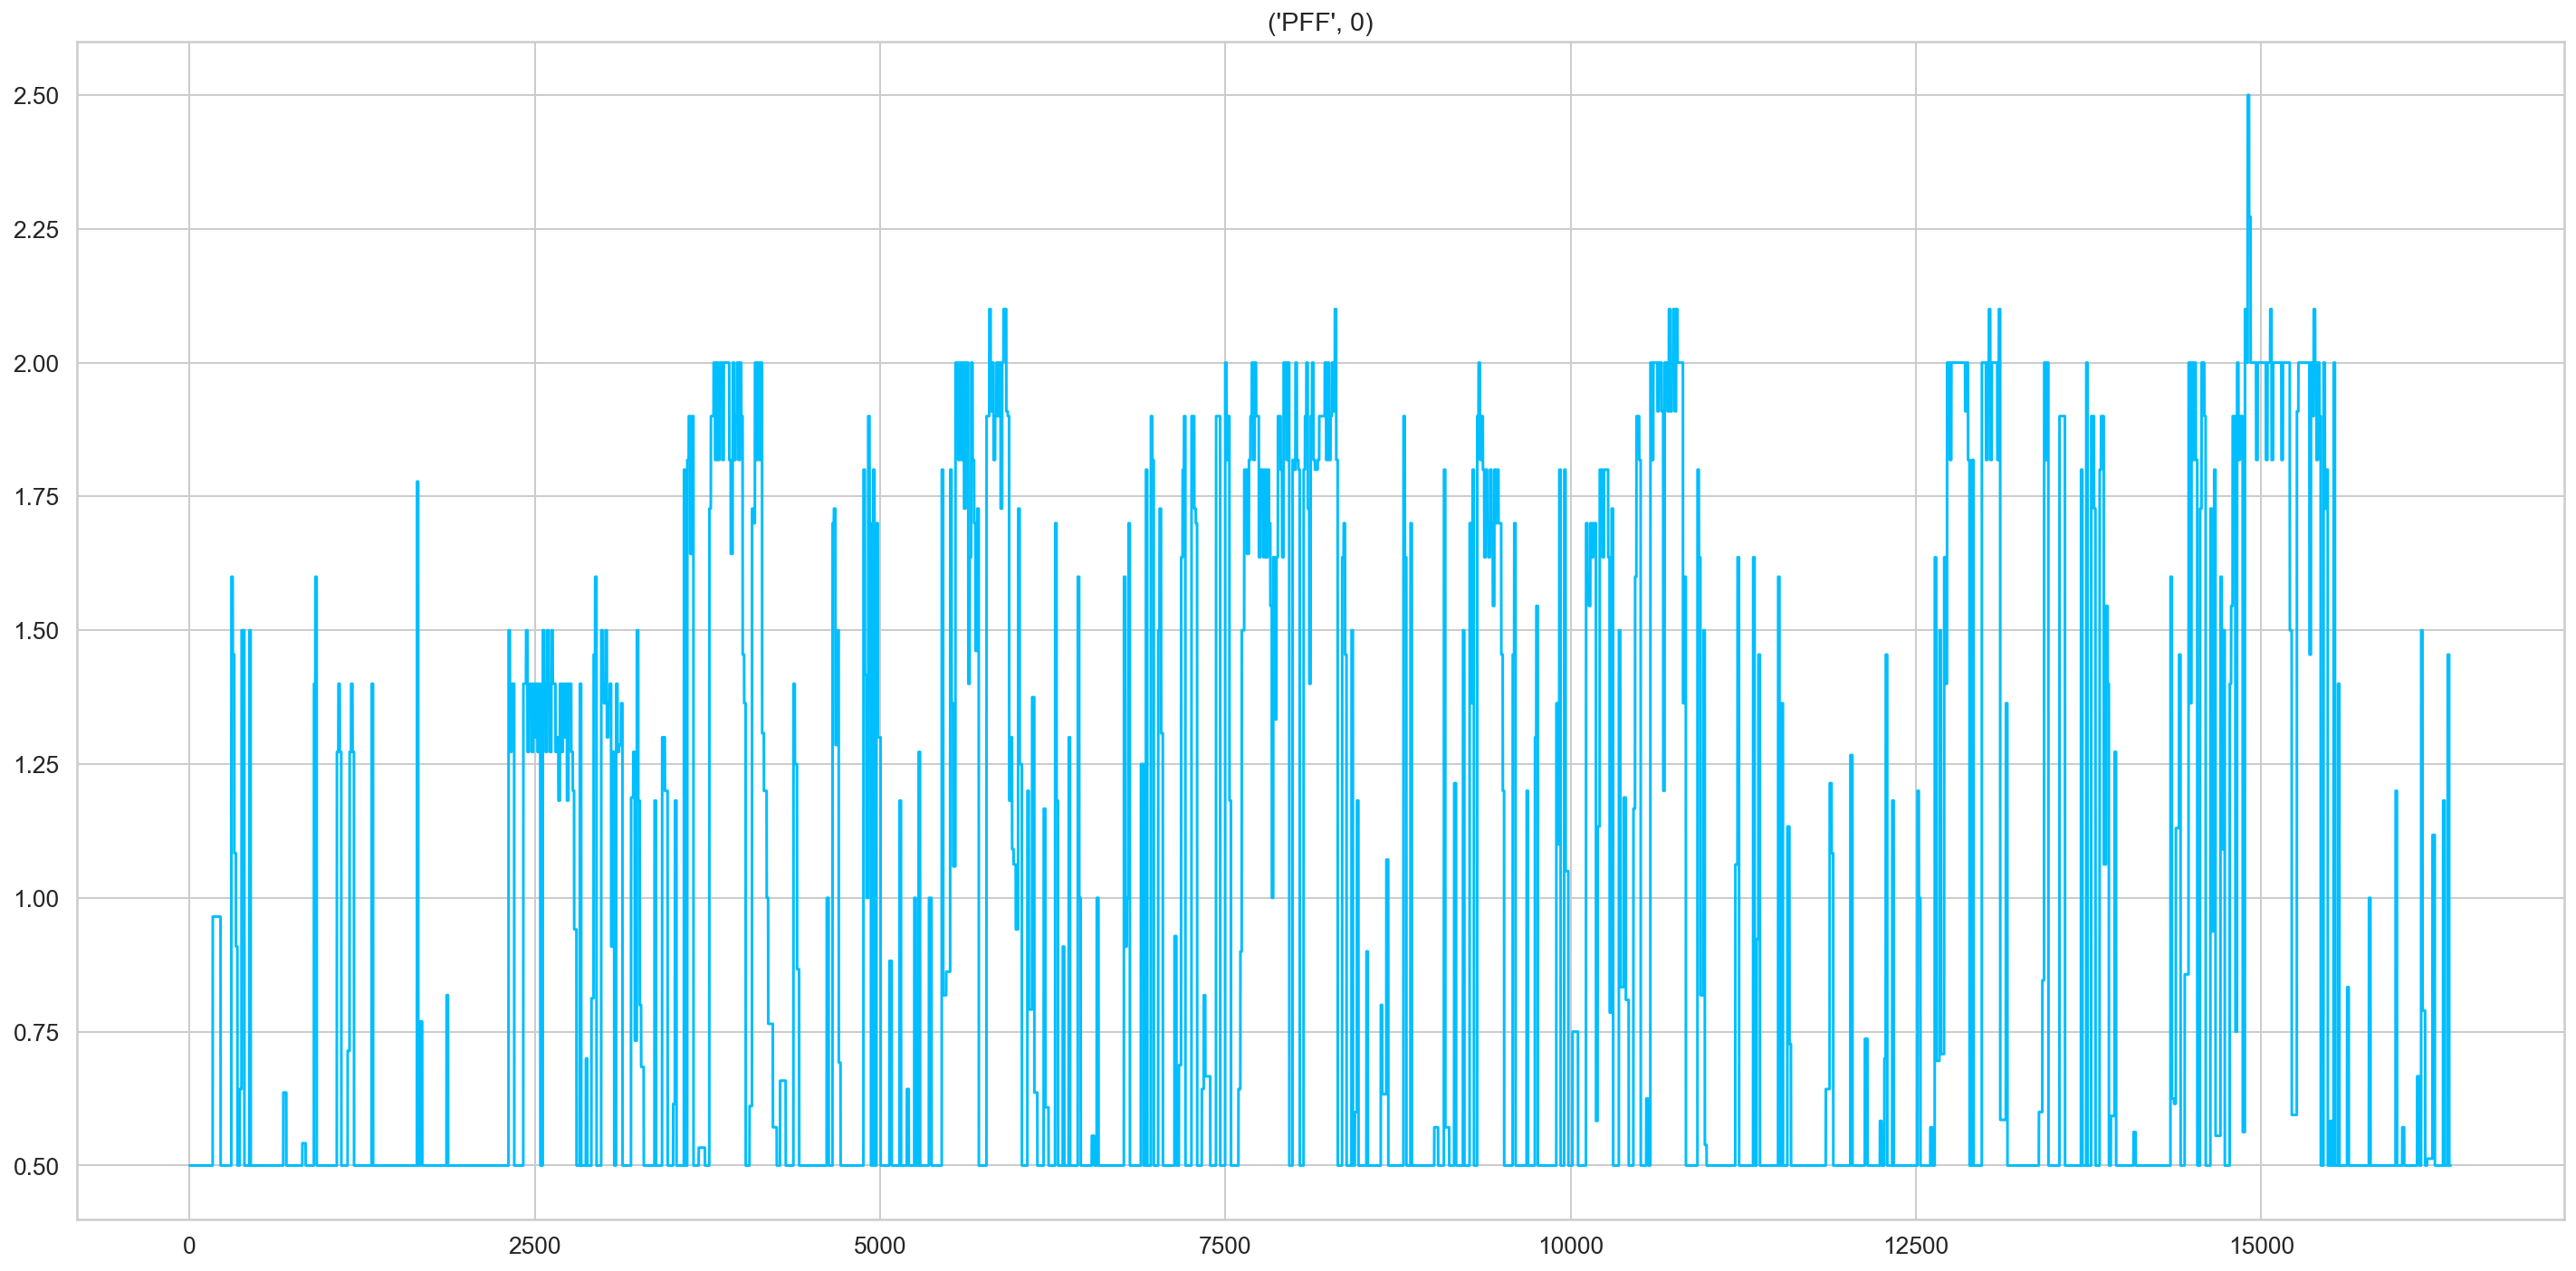

In [120]:
plot_time_series(clean_df2, 'plotting_data/clean2')

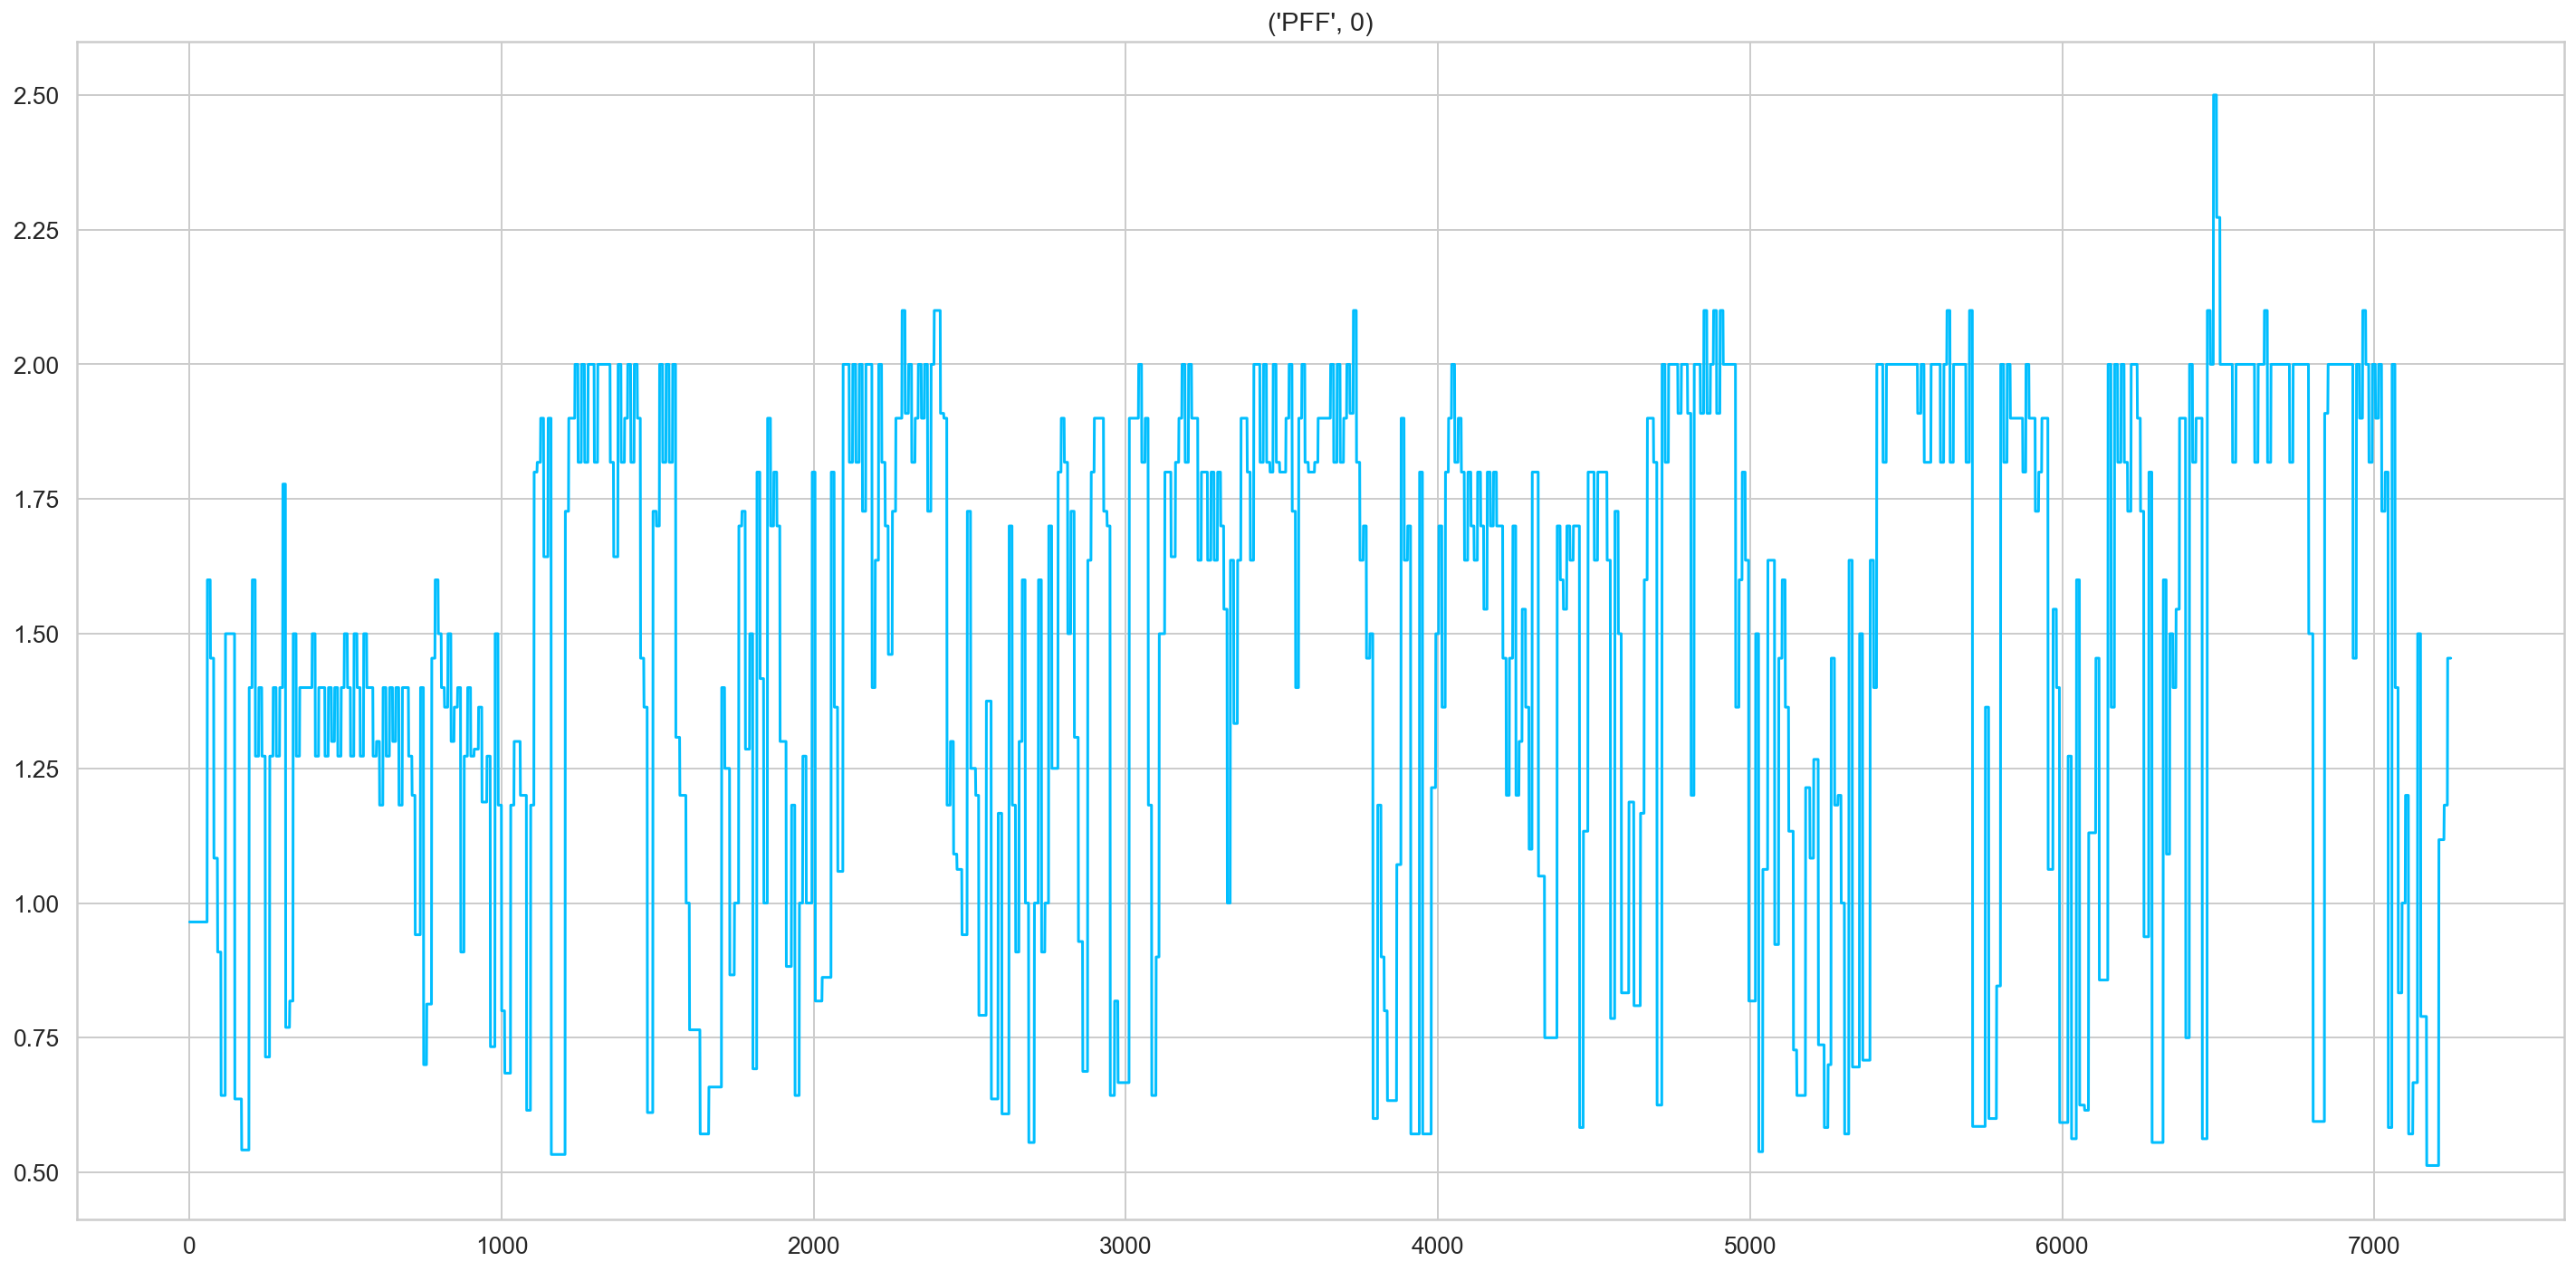

In [121]:
plot_time_series(clean_df3, 'plotting_data/clean3')

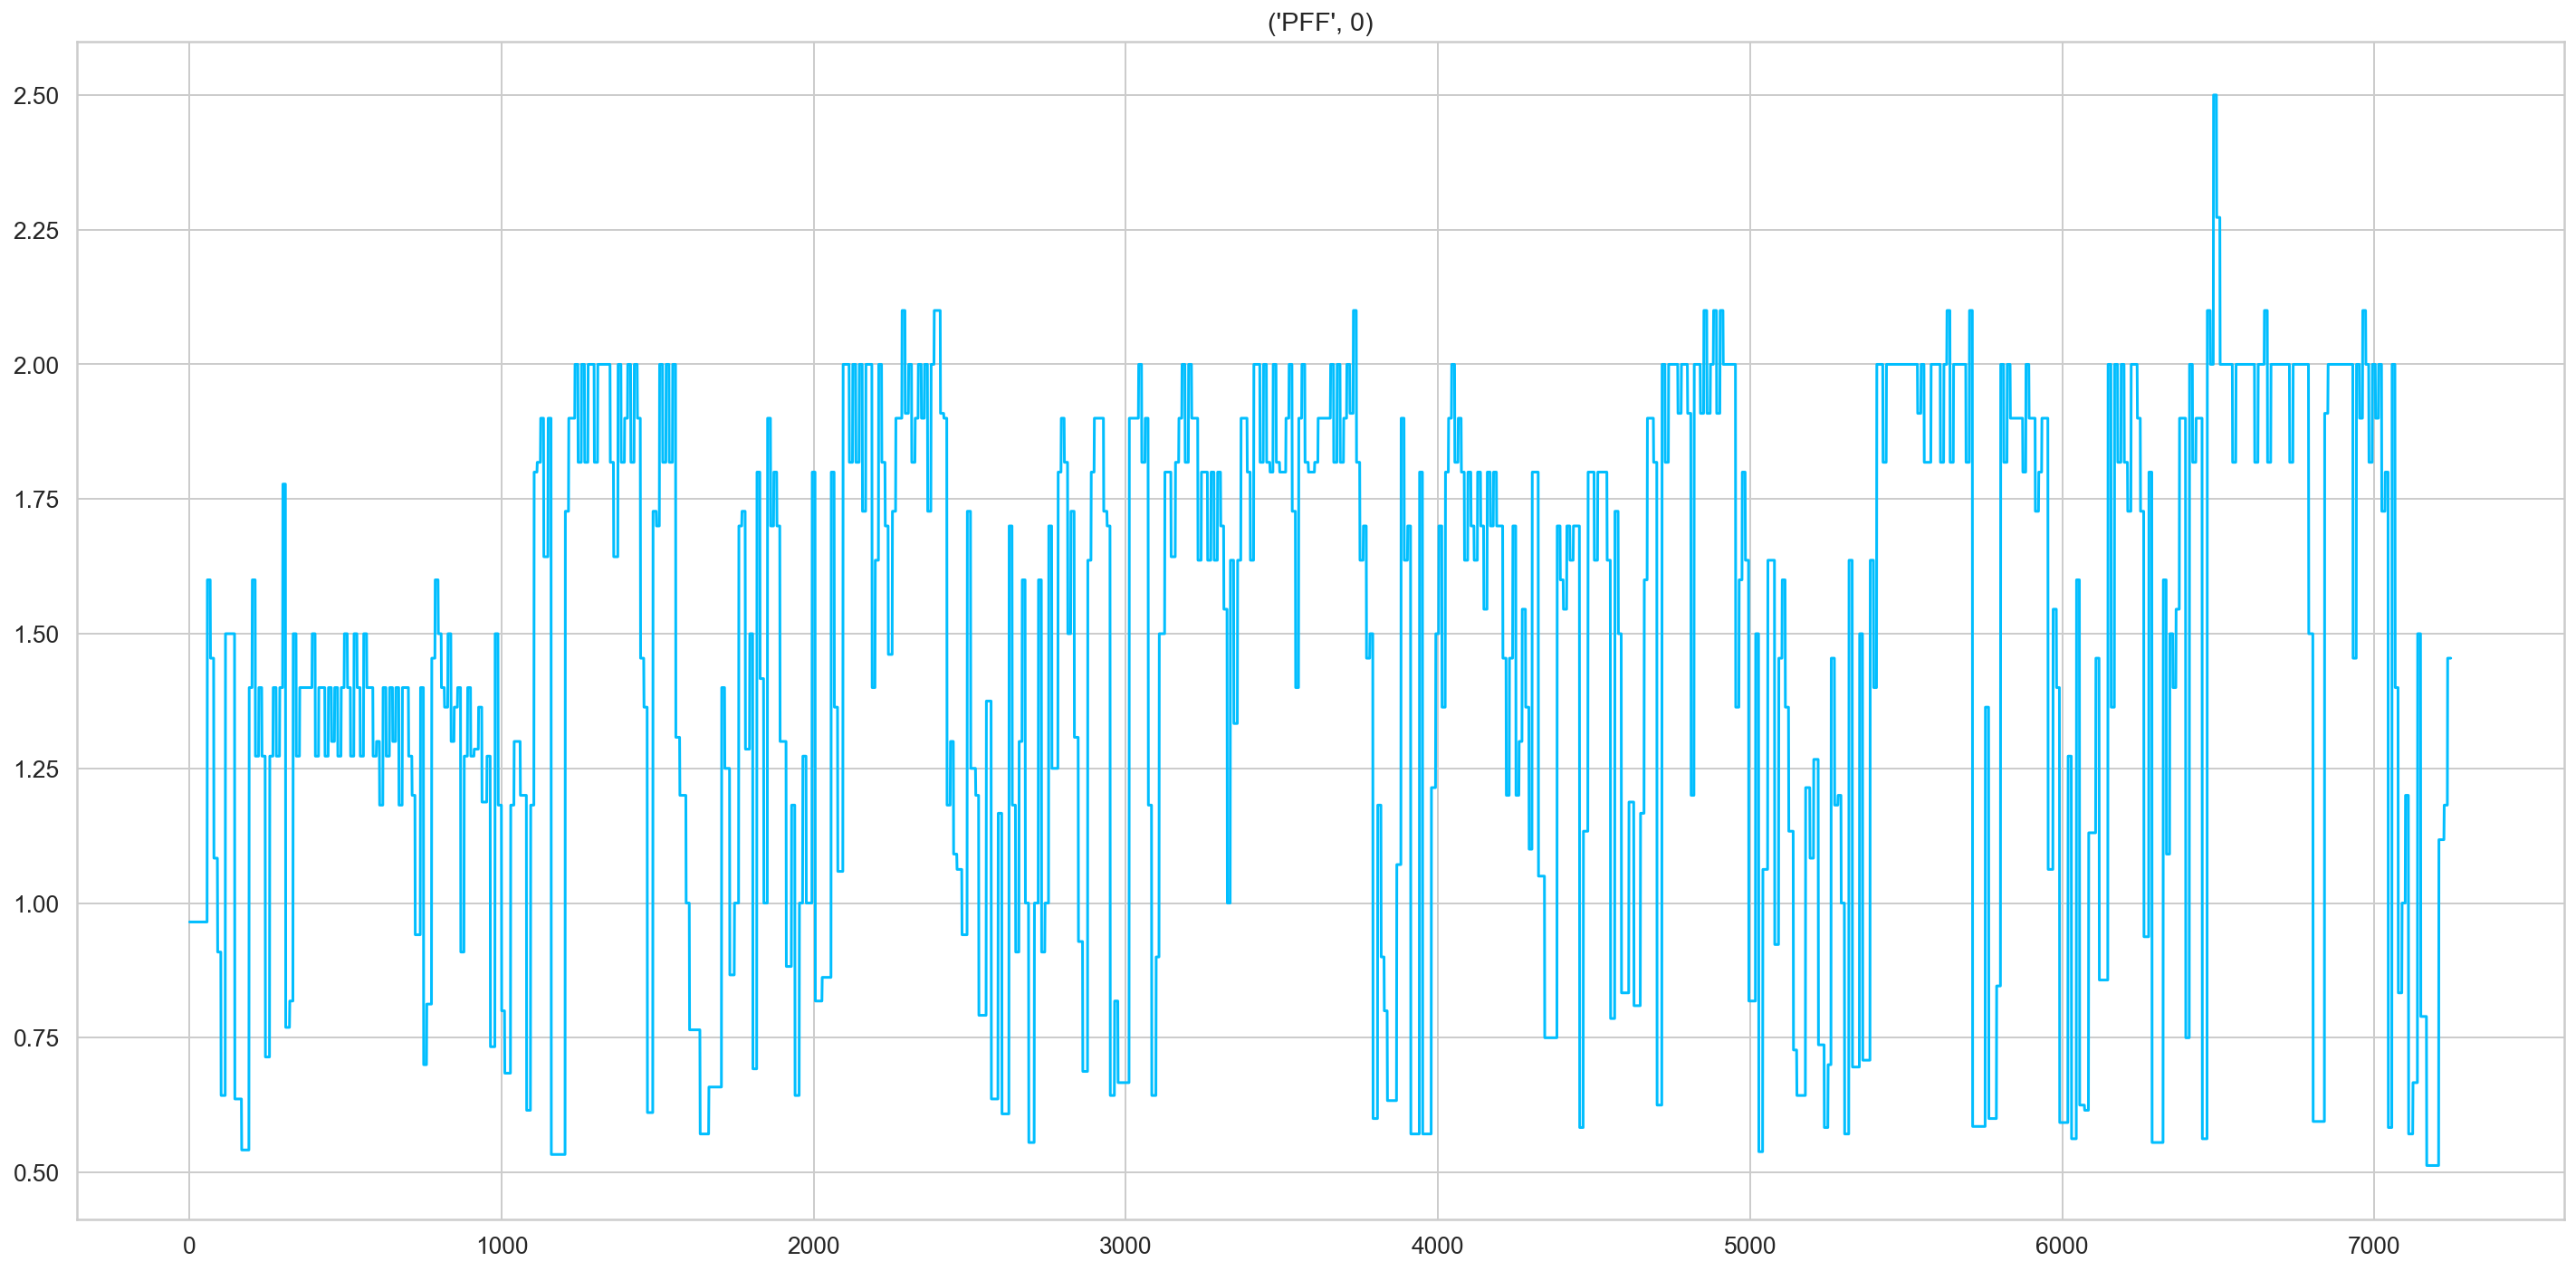

In [122]:
plot_time_series(clean_df4, 'plotting_data/clean4')

Study the non zero sps only. Store it in the **non_valid_ids** list, along with those with a high number of 0.5-sps.

In [ ]:
for c in df_nonzero['Cohort'].unique():
    print('Cohort analyzed: ', c)
    c_df = df_nonzero.loc[df_nonzero['Cohort']==c]
    #if len(c_df['IndoorProb'].unique())>1:
    #    c_df['StdSteps'] = StandardScaler.fit_transform(p_df['StepPerSec'])
    c_df['StepPerSec'] = c_df['StepPerSec'].astype(float)

    sns.catplot(x="Patient", y="StepPerSec", hue="IndoorProb", 
    kind="violin", palette="Set2", data=c_df, inner='quartile', scale='count', split=True)

    plt.show()
        

In [30]:
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2)

for c in df_nonzero['Cohort'].unique():
    c_df = df_nonzero[df_nonzero['Cohort']==c]
    if len(c_df['IndoorProb'].unique())>1:
        model.fit(c_df[['StepPerSec', 'IndoorProb']])
        centroids = model.cluster_centers_
        print(centroids)

        plt.scatter(c_df['StepPerSec'], c_df['IndoorProb'], c= model.labels_.astype(float), s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()